# Iris Flower Classification using TensorFlow ANN

## Introduction
This notebook demonstrates an end-to-end machine learning project with a simple artificial neural network using TensorFlow and Keras. We will process the Iris dataset and build a classifier to predict the species of Iris flowers.

## 1. Data Loading
We'll start by loading the Iris dataset directly from scikit-learn's datasets.

In [1]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

iris = datasets.load_iris()
X = iris.data
y = iris.target

y = np.expand_dims(y, axis=1)

In [4]:
iris.target.shape

(150,)

## 2. Data Preprocessing
Normalize the features and encode the labels.

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels with one-hot encoding
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y).toarray()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

## 3. Building an ANN Model
Create a simple ANN with two hidden layers.

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
                      Dense(10, activation='relu', input_shape=(4,)),
                      Dense(10, activation='relu'),
                      Dense(3, activation='softmax')
                  ])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 4. Training the Model
Train the model using the training data.

In [60]:
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test),batch_size = 120)

Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 1.0545 - val_accuracy: 0.3333 - val_loss: 1.0753
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.3333 - loss: 1.0481 - val_accuracy: 0.3333 - val_loss: 1.0689
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.3333 - loss: 1.0418 - val_accuracy: 0.3333 - val_loss: 1.0625
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.3333 - loss: 1.0355 - val_accuracy: 0.3333 - val_loss: 1.0561
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.3333 - loss: 1.0294 - val_accuracy: 0.3333 - val_loss: 1.0499
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.3333 - loss: 1.0233 - val_accuracy: 0.3333 - val_loss: 1.0437
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.3333 - loss: 1.0174 - val_accuracy: 0.3333 - val_loss: 1.0377
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.3333 - loss: 1.0115 - val_accuracy: 0.3333 - val_los

## 5. Evaluating the Model
Evaluate the model's performance on the test dataset and display the accuracy.

In [32]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

1/1 - 0s - 111ms/step - accuracy: 1.0000 - loss: 0.0772
Test accuracy: 1.0000


In [34]:
model.save('model_150_epochs.h5')

## 6. Conclusion
This notebook covered the basics of using TensorFlow to build an ANN for a classification problem. The results can be further improved by experimenting with different architectures, activation functions, and optimization techniques.

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

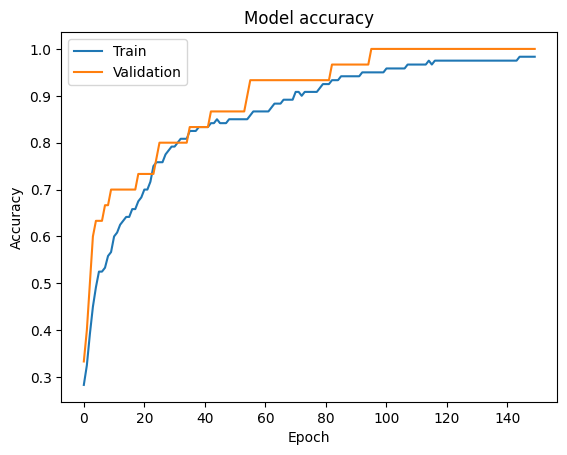

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

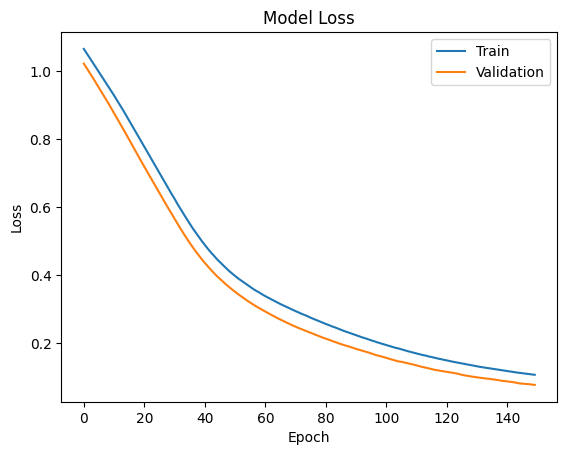

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [48]:
np.reshape(X_train[0], (1,4))

array([[-1.50652052,  1.24920112, -1.56757623, -1.3154443 ]])

In [46]:
X_train[0].shape

(4,)

In [51]:
model.predict(np.reshape(X_train[0], (1,4)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[9.9866319e-01, 1.2354332e-03, 1.0143346e-04]], dtype=float32)